Question 2

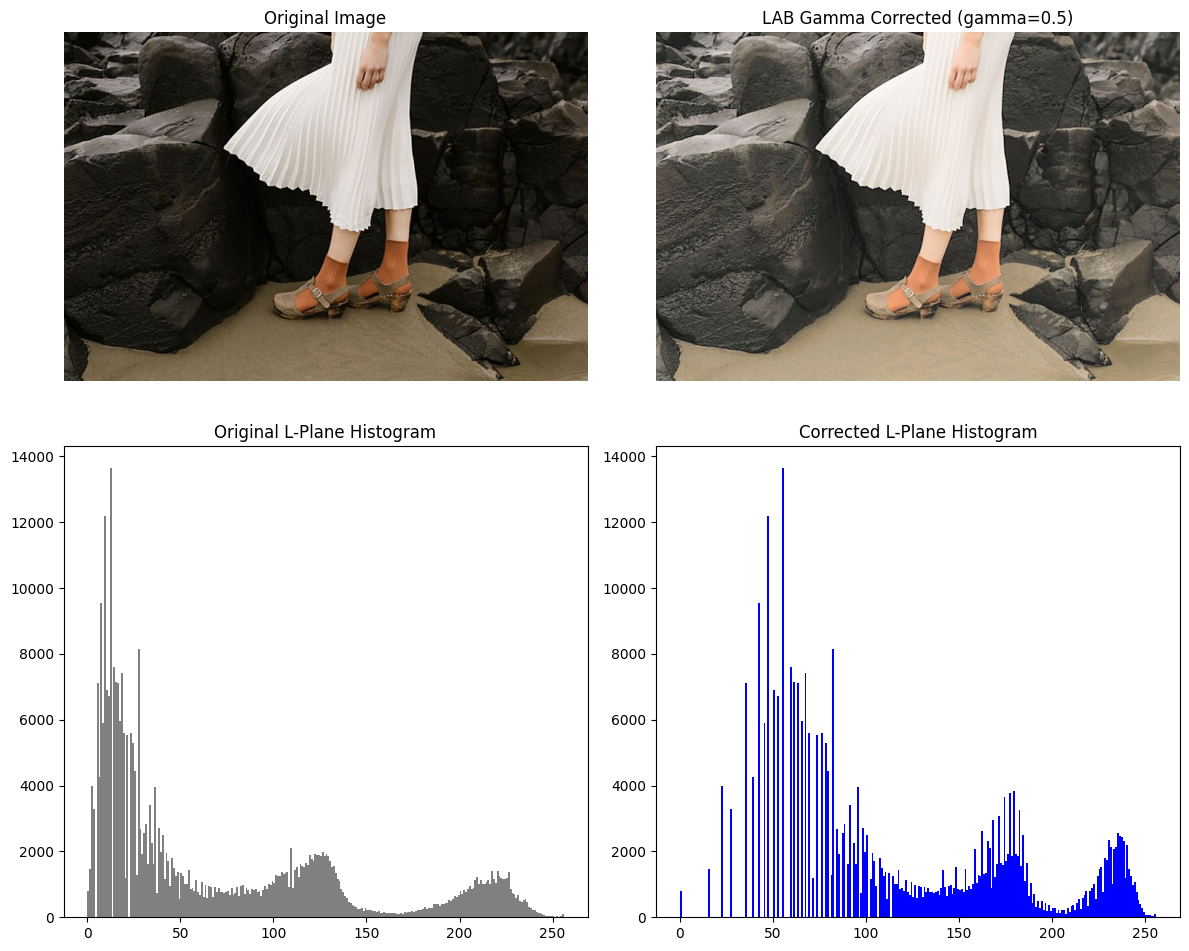

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def solve_question_2(image_path, gamma=0.5):
    
    img = cv2.imread(image_path)
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    
    l_normalized = l / 255.0
    l_corrected_norm = np.power(l_normalized, gamma)
    l_corrected = np.uint8(l_corrected_norm * 255)

   
    lab_res = cv2.merge([l_corrected, a, b])
    img_res = cv2.cvtColor(lab_res, cv2.COLOR_LAB2BGR)
    img_res_rgb = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)

    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Original Image
    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Corrected Image
    axes[0, 1].imshow(img_res_rgb)
    axes[0, 1].set_title(f'LAB Gamma Corrected (gamma={gamma})')
    axes[0, 1].axis('off')

    # Original Histogram (L Plane)
    axes[1, 0].hist(l.ravel(), 256, [0, 256], color='gray')
    axes[1, 0].set_title('Original L-Plane Histogram')

    # Corrected Histogram (L Plane)
    axes[1, 1].hist(l_corrected.ravel(), 256, [0, 256], color='blue')
    axes[1, 1].set_title('Corrected L-Plane Histogram')

    plt.tight_layout()
    plt.show()


solve_question_2('highlights_and_shadows.jpg', gamma=0.5)